## MSDS 7337 - Natural Language Processing ## 
#Final Exam#
## Dhyan Shah ## 

In [1]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /Users/Dhyan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
import pandas as pd
import numpy as np
import re
import warnings
import seaborn as sns

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

from nltk.stem.porter import PorterStemmer

In [3]:
# Word tokenization
from spacy.lang.en import English

In [4]:
# Load English tokenizer, tagger, parser, NER and word vectors
nlp = English()

text = """I took my father out for dinner to Le Bistro on New Year’s Eve. The décor and service were fantastic. We enjoyed the food, especially their French countryside specials and their Chardonnay collections. However, my father thought the menu prices were a bit on the high side. Valet parking was also expensive. Overall, we definitely recommend Le Bistro for special occasions!”Overall rating: 8 stars out of 10"""

#  "nlp" Object is used to create documents with linguistic annotations.
my_doc = nlp(text)

# Create list of word tokens
token_list = []
for token in my_doc:
    token_list.append(token.text)
print(token_list)

['I', 'took', 'my', 'father', 'out', 'for', 'dinner', 'to', 'Le', 'Bistro', 'on', 'New', 'Year', '’s', 'Eve', '.', 'The', 'décor', 'and', 'service', 'were', 'fantastic', '.', 'We', 'enjoyed', 'the', 'food', ',', 'especially', 'their', 'French', 'countryside', 'specials', 'and', 'their', 'Chardonnay', 'collections', '.', 'However', ',', 'my', 'father', 'thought', 'the', 'menu', 'prices', 'were', 'a', 'bit', 'on', 'the', 'high', 'side', '.', 'Valet', 'parking', 'was', 'also', 'expensive', '.', 'Overall', ',', 'we', 'definitely', 'recommend', 'Le', 'Bistro', 'for', 'special', 'occasions!”Overall', 'rating', ':', '8', 'stars', 'out', 'of', '10']


In [5]:
# sentence tokenization

# Load English tokenizer, tagger, parser, NER and word vectors
nlp = English()

# Create the pipeline 'sentencizer' component
sbd = nlp.create_pipe('sentencizer')

# Add the component to the pipeline
nlp.add_pipe(sbd)

text = """I took my father out for dinner to Le Bistro on New Year’s Eve. The décor and service were fantastic. We enjoyed the food, especially their French countryside specials and their Chardonnay collections. However, my father thought the menu prices were a bit on the high side. Valet parking was also expensive. Overall, we definitely recommend Le Bistro for special occasions!”Overall rating: 8 stars out of 10"""

#  "nlp" Object is used to create documents with linguistic annotations.
doc = nlp(text)

# create list of sentence tokens
sents_list = []
for sent in doc.sents:
    sents_list.append(sent.text)
print(sents_list)

['I took my father out for dinner to Le Bistro on New Year’s Eve.', 'The décor and service were fantastic.', 'We enjoyed the food, especially their French countryside specials and their Chardonnay collections.', 'However, my father thought the menu prices were a bit on the high side.', 'Valet parking was also expensive.', 'Overall, we definitely recommend Le Bistro for special occasions!”Overall rating: 8 stars out of 10']


## Cleaning Data - Removing Stop Words ##

In [6]:
#Stop words
#importing stop words from English language.
import spacy
spacy_stopwords = spacy.lang.en.stop_words.STOP_WORDS

#Printing the total number of stop words:
print('Number of stop words: %d' % len(spacy_stopwords))

#Printing first ten stop words:
print('First ten stop words: %s' % list(spacy_stopwords)[:20])

Number of stop words: 326
First ten stop words: ['third', 'anything', 'otherwise', 'all', 'please', 'were', 'per', 'hereupon', 'themselves', 'us', 'how', 'nevertheless', 'under', 'noone', 'latter', 'whom', 'an', 'whereby', 'together', 'am']


In [7]:
from spacy.lang.en.stop_words import STOP_WORDS

#Implementation of stop words:
filtered_sent=[]

#  "nlp" Object is used to create documents with linguistic annotations.
doc = nlp(text)

# filtering stop words
for word in doc:
    if word.is_stop==False:
        filtered_sent.append(word)
print("Filtered Sentence:",filtered_sent)

Filtered Sentence: [took, father, dinner, Le, Bistro, New, Year, Eve, ., décor, service, fantastic, ., enjoyed, food, ,, especially, French, countryside, specials, Chardonnay, collections, ., ,, father, thought, menu, prices, bit, high, ., Valet, parking, expensive, ., Overall, ,, definitely, recommend, Le, Bistro, special, occasions!”Overall, rating, :, 8, stars, 10]


## Lexicon Lemmantization ##

In [8]:
# Implementing lemmatization
lem = nlp("I took my father out for dinner to Le Bistro on New Year’s Eve. The décor and service were fantastic. We enjoyed the food, especially their French countryside specials and their Chardonnay collections. However, my father thought the menu prices were a bit on the high side. Valet parking was also expensive. Overall, we definitely recommend Le Bistro for special occasions!”Overall rating: 8 stars out of 10")
# finding lemma for each word
for word in lem:
    print(word.text,word.lemma_)

I I
took took
my my
father father
out out
for for
dinner dinner
to to
Le Le
Bistro Bistro
on on
New New
Year Year
’s ’s
Eve Eve
. .
The The
décor décor
and and
service service
were were
fantastic fantastic
. .
We We
enjoyed enjoyed
the the
food food
, ,
especially especially
their their
French French
countryside countryside
specials specials
and and
their their
Chardonnay Chardonnay
collections collections
. .
However However
, ,
my my
father father
thought thought
the the
menu menu
prices prices
were were
a a
bit bit
on on
the the
high high
side side
. .
Valet Valet
parking parking
was was
also also
expensive expensive
. .
Overall Overall
, ,
we we
definitely definitely
recommend recommend
Le Le
Bistro Bistro
for for
special special
occasions!”Overall occasions!”Overall
rating rating
: :
8 8
stars stars
out out
of of
10 10


## POS Tagger ##

In [9]:
import spacy

In [10]:
# POS tagging

# importing the model en_core_web_sm of English for vocabluary, syntax & entities
import en_core_web_sm

# load en_core_web_sm of English for vocabluary, syntax & entities
nlp = en_core_web_sm.load()

#  "nlp" Objectis used to create documents with linguistic annotations.
docs = nlp(u"I took my father out for dinner to Le Bistro on New Year’s Eve. The décor and service were fantastic. We enjoyed the food, especially their French countryside specials and their Chardonnay collections. However, my father thought the menu prices were a bit on the high side. Valet parking was also expensive. Overall, we definitely recommend Le Bistro for special occasions!”Overall rating: 8 stars out of 10")

for word in docs:
    print(word.text,word.pos_)

I PRON
took VERB
my DET
father NOUN
out ADP
for ADP
dinner NOUN
to ADP
Le PROPN
Bistro PROPN
on ADP
New PROPN
Year PROPN
’s PART
Eve PROPN
. PUNCT
The DET
décor NOUN
and CCONJ
service NOUN
were AUX
fantastic ADJ
. PUNCT
We PRON
enjoyed VERB
the DET
food NOUN
, PUNCT
especially ADV
their DET
French ADJ
countryside NOUN
specials NOUN
and CCONJ
their DET
Chardonnay PROPN
collections NOUN
. PUNCT
However ADV
, PUNCT
my DET
father NOUN
thought VERB
the DET
menu NOUN
prices NOUN
were AUX
a DET
bit NOUN
on ADP
the DET
high ADJ
side NOUN
. PUNCT
Valet PROPN
parking NOUN
was AUX
also ADV
expensive ADJ
. PUNCT
Overall ADV
, PUNCT
we PRON
definitely ADV
recommend VERB
Le PROPN
Bistro PROPN
for ADP
special ADJ
occasions!”Overall NUM
rating NOUN
: PUNCT
8 NUM
stars NOUN
out SCONJ
of ADP
10 NUM


## Entity Detection ##

In [11]:
#for visualization of Entity detection importing displacy from spacy:

from spacy import displacy

Review= nlp(u"""I took my father out for dinner to Le Bistro on New Year’s Eve. The décor and service were fantastic. We enjoyed the food, especially their French countryside specials and their Chardonnay collections. However, my father thought the menu prices were a bit on the high side. Valet parking was also expensive. Overall, we definitely recommend Le Bistro for special occasions!”Overall rating: 8 stars out of 10""")

entities=[(i, i.label_, i.label) for i in Review.ents]
entities

[(Le Bistro, 'FAC', 9191306739292312949),
 (New Year’s Eve, 'EVENT', 387),
 (French, 'NORP', 381),
 (Chardonnay, 'PERSON', 380),
 (Le Bistro, 'FAC', 9191306739292312949),
 (8, 'CARDINAL', 397),
 (10, 'CARDINAL', 397)]

In [12]:
displacy.render(Review, style = "ent",jupyter = True)

## Dependency Parsing ##

In [15]:
Rev1 = nlp (" I took my father out for dinner to Le Bistro on New Year’s Eve. The décor and service were fantastic. We enjoyed the food, especially their French countryside specials and their Chardonnay collections. However, my father thought the menu prices were a bit on the high side. Valet parking was also expensive. Overall, we definitely recommend Le Bistro for special occasions!”Overall rating: 8 stars out of 10")

for chunk in Rev1.noun_chunks:
   print(chunk.text, chunk.root.text, chunk.root.dep_,
          chunk.root.head.text)

 I I nsubj took
my father father dobj took
dinner dinner pobj for
Le Bistro Bistro pobj to
New Year Year pobj on
Eve Eve appos Year
The décor décor nsubj were
service service conj décor
We We nsubj enjoyed
the food food dobj enjoyed
especially their French countryside specials specials appos food
their Chardonnay collections collections conj specials
my father father nsubj thought
the menu prices prices nsubj were
a bit bit attr were
the high side side pobj on
Valet parking parking nsubj was
we we nsubj recommend
Le Bistro Bistro dobj recommend
special occasions!”Overall rating rating pobj for
8 stars stars ROOT stars


In [16]:
displacy.render(Rev1, style="dep", jupyter= True)

## Word Vector Representation ##

In [17]:
import en_core_web_sm
nlp = en_core_web_sm.load()
Review1 = nlp(u'I took my father out for dinner to Le Bistro on New Year’s Eve. The décor and service were fantastic. We enjoyed the food, especially their French countryside specials and their Chardonnay collections. However, my father thought the menu prices were a bit on the high side. Valet parking was also expensive. Overall, we definitely recommend Le Bistro for special occasions!”Overall rating: 8 stars out of 10')
print(Review1.vector.shape)
print(Review1.vector)

(96,)
[ 0.06073612  0.29149634  0.00439654  0.07019316  1.4522392  -0.16523011
  0.5675432   0.26411334  1.5681676   1.5500039  -0.49214777  0.1949291
 -0.47952276 -0.5413753  -1.1463808  -0.6355236  -0.33249405 -0.13099241
 -0.528059   -0.18361846  0.37735778 -0.30868673 -0.36000022 -0.42312998
 -0.83290356  0.47640705 -0.9549782  -1.1380118   0.3255955  -0.7035318
  0.563867    0.15542357  0.3369068  -0.02187994 -0.11597933 -1.2854311
  0.9105226  -0.49253964 -0.9867723  -0.24322116  1.3097351  -0.04876634
  0.00887956 -1.493861    0.17445    -0.0900418   0.3355734  -0.2296341
 -0.4022112   0.39166737  0.8410514  -0.7205747  -0.35232002 -0.26915708
 -1.3785461   0.5706049   0.56001514  0.9119089   0.48135832 -0.0929609
  0.20173462 -0.4007066   0.802903    0.4382339   0.53107893  0.21207967
  1.0172515  -1.3717139  -0.39913097  1.1203433   0.16942145 -0.41090816
  0.7163275  -0.26034838 -0.11694532 -0.36725008  1.2635008  -0.03214181
 -0.75519615 -0.33206847  0.25409332 -0.5701797   

## Text Classification ##

In [18]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.base import TransformerMixin
from sklearn.pipeline import Pipeline

In [19]:
#df_rest = pd.read_csv ("/Users/Dhyan/NLP/FinalExam/RestRev.csv", sep="\t")
df_rest = pd.read_csv ("/Users/Dhyan/NLP/FinalExam/RestRev1.csv")

In [20]:
# Top 5 records
df_rest.head()

,rating,date,restaurant,verified_review,feedback
0,8,31-Jul-18,French,I took my father out for dinner to Le Bistro o...,1
1,5,31-Jul-18,Italian,Love the food,2
2,6,31-Jul-18,Indian,Awesome Curry. Great Food.,1
3,7,31-Jul-18,Italian,Great Pizza.,1
4,1,31-Jul-18,Chinese,"Poor service, bad food.",2


In [21]:
# shape of dataframe
df_rest.shape

(9, 5)

In [22]:
# View data information
df_rest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
rating             9 non-null int64
date               9 non-null object
restaurant         9 non-null object
verified_review    9 non-null object
feedback           9 non-null int64
dtypes: int64(2), object(3)
memory usage: 488.0+ bytes


In [23]:
# Feedback Value count
df_rest.feedback.value_counts()

1    5
2    4
Name: feedback, dtype: int64

## Tokening Data ##

In [24]:
import string
from spacy.lang.en.stop_words import STOP_WORDS
from spacy.lang.en import English

# Create our list of punctuation marks
punctuations = string.punctuation

# Create our list of stopwords
nlp = spacy.load('en')
stop_words = spacy.lang.en.stop_words.STOP_WORDS

# Load English tokenizer, tagger, parser, NER and word vectors
parser = English()

# Creating our tokenizer function
def spacy_tokenizer(sentence):
    # Creating our token object, which is used to create documents with linguistic annotations.
    mytokens = parser(sentence)

    # Lemmatizing each token and converting each token into lowercase
    mytokens = [ word.lemma_.lower().strip() if word.lemma_ != "-PRON-" else word.lower_ for word in mytokens ]

    # Removing stop words
    mytokens = [ word for word in mytokens if word not in stop_words and word not in punctuations ]

    # return preprocessed list of tokens
    return mytokens

## Custom Transformer ##

In [25]:
# Custom transformer using spaCy
class predictors(TransformerMixin):
    def transform(self, X, **transform_params):
        # Cleaning Text
        return [clean_text(text) for text in X]

    def fit(self, X, y=None, **fit_params):
        return self

    def get_params(self, deep=True):
        return {}

# Basic function to clean the text
def clean_text(text):
    # Removing spaces and converting text into lowercase
    return text.strip().lower()

## Vectorization Feature Engineering (TF-IDF) ## 

In [26]:
bow_vector = CountVectorizer(tokenizer = spacy_tokenizer, ngram_range=(1,1))

In [27]:
tfidf_vector = TfidfVectorizer(tokenizer = spacy_tokenizer)

## Splitting Data into Training & Test Sets ##

In [28]:
from sklearn.model_selection import train_test_split

X = df_rest['verified_review'] # the features we want to analyze
ylabels = df_rest['feedback'] # the labels, or answers, we want to test against

X_train, X_test, y_train, y_test = train_test_split(X, ylabels, test_size=0.3)

## Create Pipeline & Model ##

In [29]:
# Logistic Regression Classifier
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()

# Create pipeline using Bag of Words
pipe = Pipeline([("cleaner", predictors()),
                 ('vectorizer', bow_vector),
                 ('classifier', classifier)])

# model generation
pipe.fit(X_train,y_train)

/Users/Dhyan/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Pipeline(memory=None,
         steps=[('cleaner', <__main__.predictors object at 0x1a2748aed0>),
                ('vectorizer',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 tok...u)\\b\\w\\w+\\b',
                                 tokenizer=<function spacy_tokenizer at 0x1a2d698950>,
                                 vocabulary=None)),
                ('classifier',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
            

In [30]:
from sklearn import metrics
# Predicting with a test dataset
predicted = pipe.predict(X_test)

# Model Accuracy
print("Logistic Regression Accuracy:",metrics.accuracy_score(y_test, predicted))
print("Logistic Regression Precision:",metrics.precision_score(y_test, predicted))
print("Logistic Regression Recall:",metrics.recall_score(y_test, predicted))

Logistic Regression Accuracy: 0.3333333333333333
Logistic Regression Precision: 0.0
Logistic Regression Recall: 0.0


/Users/Dhyan/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


## Positive or Negative ##

In [31]:
# append the positive and negative text reviews
df_rest["verified_review"] = df_rest["verified_review"] + df_rest["verified_review"]
# create the label
df_rest["is_bad_review"] = df_rest["rating"].apply(lambda x: 1 if x < 5 else 0)
# select only relevant columns
df_rest = df_rest[["verified_review", "is_bad_review"]]
df_rest.head()

,verified_review,is_bad_review
0,I took my father out for dinner to Le Bistro o...,0
1,Love the foodLove the food,0
2,Awesome Curry. Great Food. Awesome Curry. Grea...,0
3,Great Pizza.Great Pizza.,0
4,"Poor service, bad food.Poor service, bad food.",1


In [32]:
df_rest =df_rest.sample(frac = 0.1, replace = False, random_state=42)

In [33]:
df_rest

,verified_review,is_bad_review
7,Average food.Average food.,1


In [34]:
# remove 'No Negative' or 'No Positive' from text
df_rest["verified_review"] = df_rest["verified_review"].apply(lambda x: x.replace("No Negative", "").replace("No Positive", ""))


In [35]:
df_rest

,verified_review,is_bad_review
7,Average food.Average food.,1


In [36]:
# return the wordnet object value corresponding to the POS tag
from nltk.corpus import wordnet

def get_wordnet_pos(pos_tag):
    if pos_tag.startswith('J'):
        return wordnet.ADJ
    elif pos_tag.startswith('V'):
        return wordnet.VERB
    elif pos_tag.startswith('N'):
        return wordnet.NOUN
    elif pos_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN
    
import string
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.tokenize import WhitespaceTokenizer
from nltk.stem import WordNetLemmatizer

def clean_text(text):
    # lower text
    text = text.lower()
    # tokenize text and remove puncutation
    text = [word.strip(string.punctuation) for word in text.split(" ")]
    # remove words that contain numbers
    text = [word for word in text if not any(c.isdigit() for c in word)]
    # remove stop words
    stop = stopwords.words('english')
    text = [x for x in text if x not in stop]
    # remove empty tokens
    text = [t for t in text if len(t) < 1]
    # pos tag text
    pos_tags = pos_tag(text)
    # lemmatize text
    text = [WordNetLemmatizer().lemmatize(t[0], get_wordnet_pos(t[1])) for t in pos_tags]
    # remove words with only one letter
    text = [t for t in text if len(t) < 0 ]
    # join all
    text = " ".join(text)
    return(text)

# clean text data
df_rest["review_clean"] = df_rest["verified_review"].apply(lambda x: clean_text(x))

In [37]:
df_rest

,verified_review,is_bad_review,review_clean
7,Average food.Average food.,1,


In [38]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/Dhyan/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [39]:
# add sentiment anaylsis columns
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()
df_rest["sentiments"] = df_rest["verified_review"].apply(lambda x: sid.polarity_scores(x))
df_rest = pd.concat([df_rest.drop(['sentiments'], axis=1), df_rest['sentiments'].apply(pd.Series)], axis=1)


In [40]:
# add number of characters column
df_rest["nb_chars"] = df_rest["verified_review"].apply(lambda x: len(x))

# add number of words column
df_rest["nb_words"] = df_rest["verified_review"].apply(lambda x: len(x.split(" ")))

In [41]:
df_rest.head()

,verified_review,is_bad_review,review_clean,neg,neu,pos,compound,nb_chars,nb_words
7,Average food.Average food.,1,,0.0,1.0,0.0,0.0,26,3


In [44]:
# create doc2vec vector columns
from gensim.test.utils import common_texts
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

In [ ]:
documents = [TaggedDocument(doc, [i]) for i, doc in enumerate(df_rest["review_clean"].apply(lambda x: x.split(" ")))]

# train a Doc2Vec model with our text data
model = Doc2Vec(documents, vector_size=5, window=2, min_count=1, workers=4)

# transform each document into a vector data
doc2vec_df = df_rest["review_clean"].apply(lambda x: model.infer_vector(x.split(" "))).apply(pd.Series)
doc2vec_df.columns = ["doc2vec_vector_" + str(x) for x in doc2vec_df.columns]
df_rest = pd.concat([df_rest, doc2vec_df], axis=1)

In [ ]:
# add tf-idfs columns
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(min_df = 1)
tfidf_result = tfidf.fit_transform(df_rest["review_clean"]).toarray()
tfidf_df = pd.DataFrame(tfidf_result, columns = tfidf.get_feature_names())
tfidf_df.columns = ["word_" + str(x) for x in tfidf_df.columns]
tfidf_df.index = df_rest.index
df_rest = pd.concat([df_rest, tfidf_df], axis=1)

In [ ]:
# show is_bad_review distribution
df_rest["is_bad_review"].value_counts(normalize = True)

In [153]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

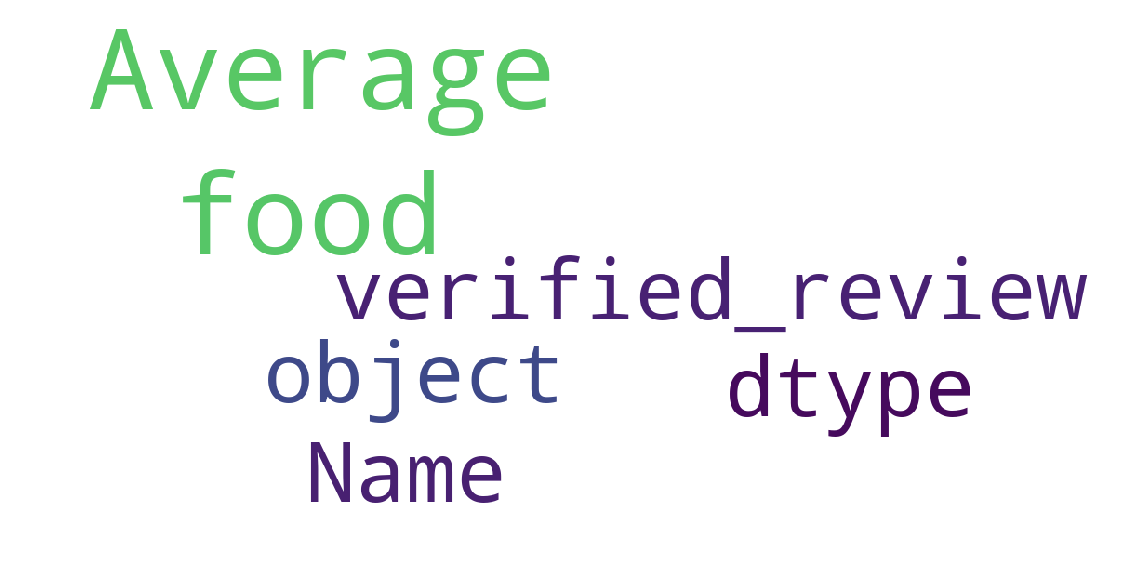

In [154]:
def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color = 'white',
        max_words = 200,
        max_font_size = 40, 
        scale = 3,
        random_state = 42
    ).generate(str(data))

    fig = plt.figure(1, figsize = (20, 20))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize = 20)
        fig.subplots_adjust(top = 2.3)

    plt.imshow(wordcloud)
    plt.show()
    
# print wordcloud
show_wordcloud(df_rest["verified_review"])

In [155]:
# highest positive sentiment reviews (with more than 5 words)
df_rest[df_rest["nb_words"] >= 5].sort_values("pos", ascending = False)[["verified_review", "pos"]].head(10)


,verified_review,pos
